<a href="https://colab.research.google.com/github/Pragatheeswara5/Machine-Learning/blob/master/Neural_networks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist   #load dataset

(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape  #60k images with 28*28 pixels

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

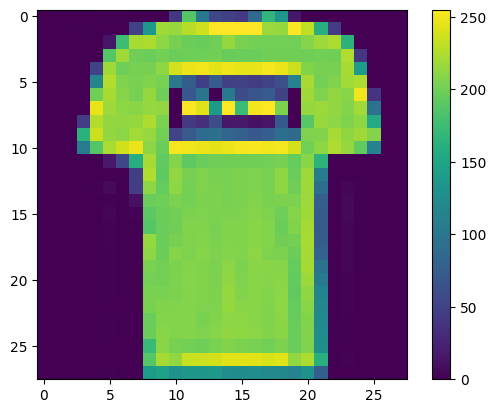

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#Data Preprocessing

the last step before creating our model is to preprocess the data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [8]:
train_images=train_images/255.0

test_images=test_images/255.0

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #input layer
    keras.layers.Dense(128,activation='relu'),  #hidden layer
    keras.layers.Dense(10,activation='softmax') #output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4928 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3728 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3337 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3098 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2939 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2790 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2674 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2566 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2468 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [12]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8816
Test Accuracy: 0.881600022315979


In [16]:
predictions=model.predict(test_images)
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 3ms/step
9


In [15]:
test_images.shape

(10000, 28, 28)

Ankle boot


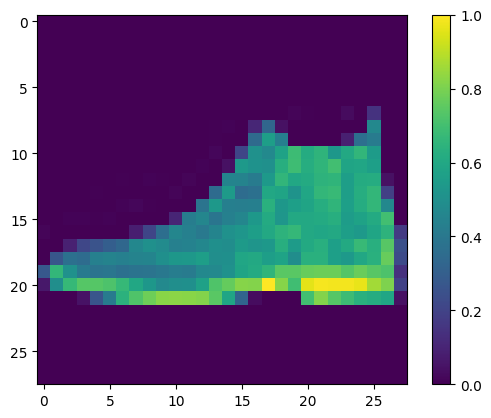

In [17]:
#predictions=model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 34
1/1 [==============================] - 0s 92ms/step


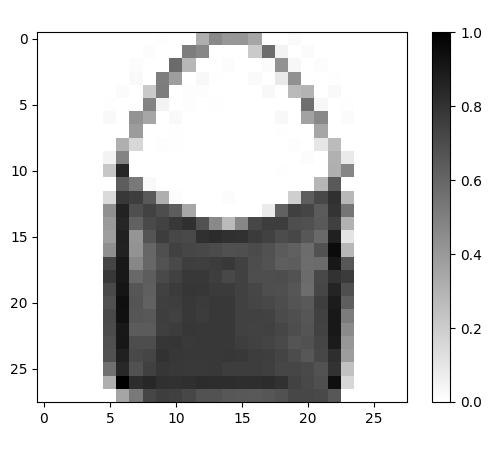

In [22]:
COLOR='white'
plt.rcParams['text.color']=COLOR
plt.rcParams['axes.labelcolor']=COLOR

def predict(model, image, correct_label):
  class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
  prediction=model.predict(np.array([image]))
  predicted_class=class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected label: "+label)
  plt.xlabel("Guess: "+guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num=input("Pick a number: ")
    if num.isdigit():
      num=int(num)
      if 0<=num<=1000:
        return int(num)
    else:
      print("Try again....")

num=get_number()
image=test_images[num]
label=test_labels[num]
predict(model,image,label)